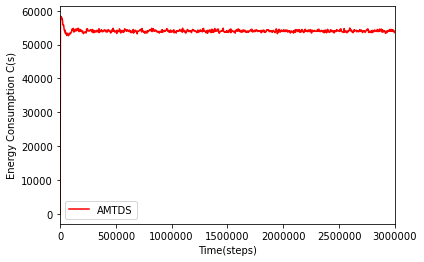

Showing C(s) Average graph is completed.


In [6]:
#evaluation-s3600(間隔3600ステップでのC(s)計算)のcsvファイルからC(s)の時間変化の平均値のグラフを出力するプログラム

import pandas as pd
import matplotlib.pyplot as plt
import pathlib

#設定
file_count = 10;
agent_type = "normal"
#agent_type = "PDALearning"
#agent_type = "Communicating"
#agent_type = "PlannedStopping"
#agent_type = "Homing"
#agent_type = "Pausing"
#target_type = "0-Random"
#target_type = "1-Greedy"
#target_type = "2-Interval"
#target_type = "3-BNPS"
#target_type = "4-AMTDS-LD"
target_type = "5-AMTDS-ESC"
#target_type = "5-AMTDS-ESC"
#target_type = "5-EpsilonG"
#target_type = "6-EpsilonB"
#target_type = "7-IntervalG"


epsilon = "0.10"

date = "03-09 15-39-22 robots-number=20"

for i in range(1, file_count+1):
    #print("./log/LTest/" + agent_type + "/Office/" + target_type + "/" + date + "_" + str(i) + "/evaluation-s3600.csv")
    df = pd.read_csv("./log/LTest/" + agent_type + "/Office/" + target_type + "/" + date + "_" + str(i) + "/evaluation-s3600.csv", names=['time', 'ds', 'maxLitteerAmount', 'cs'], header=None)
    if(i == 1):
        df_sum = df
    else:
        df_sum += df
        
#平均値計算
ave_df = df_sum / file_count

#プロット
if agent_type == "normal":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="AMTDS")
elif agent_type == "Communicating":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="AMTDS/EDC")
elif agent_type == "PlannedStopping":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="AMTDS/THE")
elif agent_type == "Homing":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="Homing")
elif agent_type == "Pausing":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="Pausing")
elif target_type == "0-Random":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="Random")
elif target_type == "1-Greedy":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="Greedy")
elif target_type == "2-Interval":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="Interval")
elif target_type == "3-BNPS":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="BNPS")
elif target_type == "4-AMTDS-LD":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="AMTDS/LD")
elif target_type == "5-AMTDS-ESC":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="AMTDS/ESC")
elif target_type == "5-EpsilonG": 
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="Greedy : " + epsilon)  
elif target_type == "6-EpsilonB": 
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="BNPS : " + epsilon)  
elif target_type == "7-IntervalG":
    plt.plot(ave_df['time'], ave_df['cs'], color="red", label="IandG")
    
#平均値をcsvファイルとして出力
p_log_dir = pathlib.Path("./log/LTest/" + agent_type + "/Office/" + target_type + "/" + date)
if not p_log_dir.exists():
    p_log_dir.mkdir(parents=True)
ave_df.to_csv(str(p_log_dir) + "/" + "evalusation-s3600_ave.csv", index=False)

#ラベルの追加
plt.xlabel('Time(steps)')
plt.ylabel('Energy Consumption C(s)')

#表示範囲の指定
plt.xlim(0, 3000000)
#plt.ylim(0, 4000000)

#凡例の追加
plt.legend()

#指数表記から普通の表記に変換
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')

#フォルダがない場合は，作成
p_dir = pathlib.Path("./result/cs_graph_ave/LTest/" + target_type)
if not p_dir.exists():
    p_dir.mkdir(parents=True)
    
#グラフの保存
if target_type == "5-EpsilonG" or target_type == "6-EpsilonB":
    plt.savefig('./result/cs_graph_ave/LTest/' + target_type + '/' + 'cs_graph_3600_ave_' + str(file_count) + '_' + date + "_" + epsilon + '.png'
            , bbox_inches='tight')

else:
    plt.savefig('./result/cs_graph_ave/LTest/' + target_type + '/' + 'cs_graph_3600_ave_' + str(file_count) + '_' + date + '.png'
            , bbox_inches='tight')

#グラフの表示
plt.show()

print("Showing C(s) Average graph is completed.")